# Final Project 4 - Kelompok 1
___
PYTN-KS17-01 <br>
Anggota: 
- Abigail Angginaomi 	
- Jaya Hari Santoso	
- Muhammad Zaisya Fitriannuur Rahman 	
- Rheina Febrianti Khairunissa `

# Latar Belakang 

Dataset ini bertujuan untuk mendukung pengembangan segmentasi pelanggan guna merumuskan strategi pemasaran yang lebih efektif. Dengan fokus pada perilaku sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir, dataset ini menyajikan 18 variabel perilaku pada tingkat pelanggan. Melalui analisis variabel seperti frekuensi penggunaan kartu, jumlah pembelian, dan keterlambatan pembayaran, perusahaan dapat mengidentifikasi pola dan kelompok pelanggan dengan karakteristik serupa. Segmentasi ini tidak hanya memungkinkan personalisasi pemasaran yang lebih baik, tetapi juga membantu dalam penyesuaian produk, manajemen risiko kredit, peningkatan retensi pelanggan, dan optimalisasi program hadiah untuk meningkatkan keterlibatan pelanggan dan keberlanjutan bisnis. Objective yang ingin dicapai jelompok kami ialah mengetahui jumlah kluster yang optimal untuk segmentasi pelanggan serta melakukan klusterisasi pelanggan bank.

# Import Libraries

Berikut merupakan libraries yang digunakan untuk melakukan final project 4 ini:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy import stats
import pickle
import warnings
warnings.filterwarnings('ignore')

# Data Loading

Melakukan loading dataset

In [2]:
df = pd.read_csv('CC GENERAL.csv')
print('Data berhasil diinput!')

Data berhasil diinput!


Melakukan pengaturan agar tidak memberi batasan maksimal untuk kolom yang ditampilkan

In [3]:
pd.set_option("display.max_columns", None)

Melihat 5 baris teratas dari dataset

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

Melihat ukuran dari Dataset:

In [5]:
df.shape

(8950, 18)

Melihat rangkuman informasi tentang dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Melihat rincian nama kolom yang ada pada dataset:

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# Data Cleaning

Data cleaning dilakukan sebagai proses yang melibatkan identifikasi, koreksi, dan penghapusan data yang tidak valid, tidak akurat, atau tidak lengkap dalam dataset. Tujuan dari data cleaning adalah untuk memastikan bahwa data yang digunakan dalam analisis atau pemodelan adalah data yang berkualitas, sehingga hasil analisis atau model yang dibangun lebih dapat diandalkan.

Mengecek apakah terdapat missing values pada data.

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dari hasil di atas, didapatkan Minimum Payments terdapat missing values sebanyak 313 data dan Credit Limit terdapat missing values sebanyak 1 data

Melihat distribusi pada semua atribut:

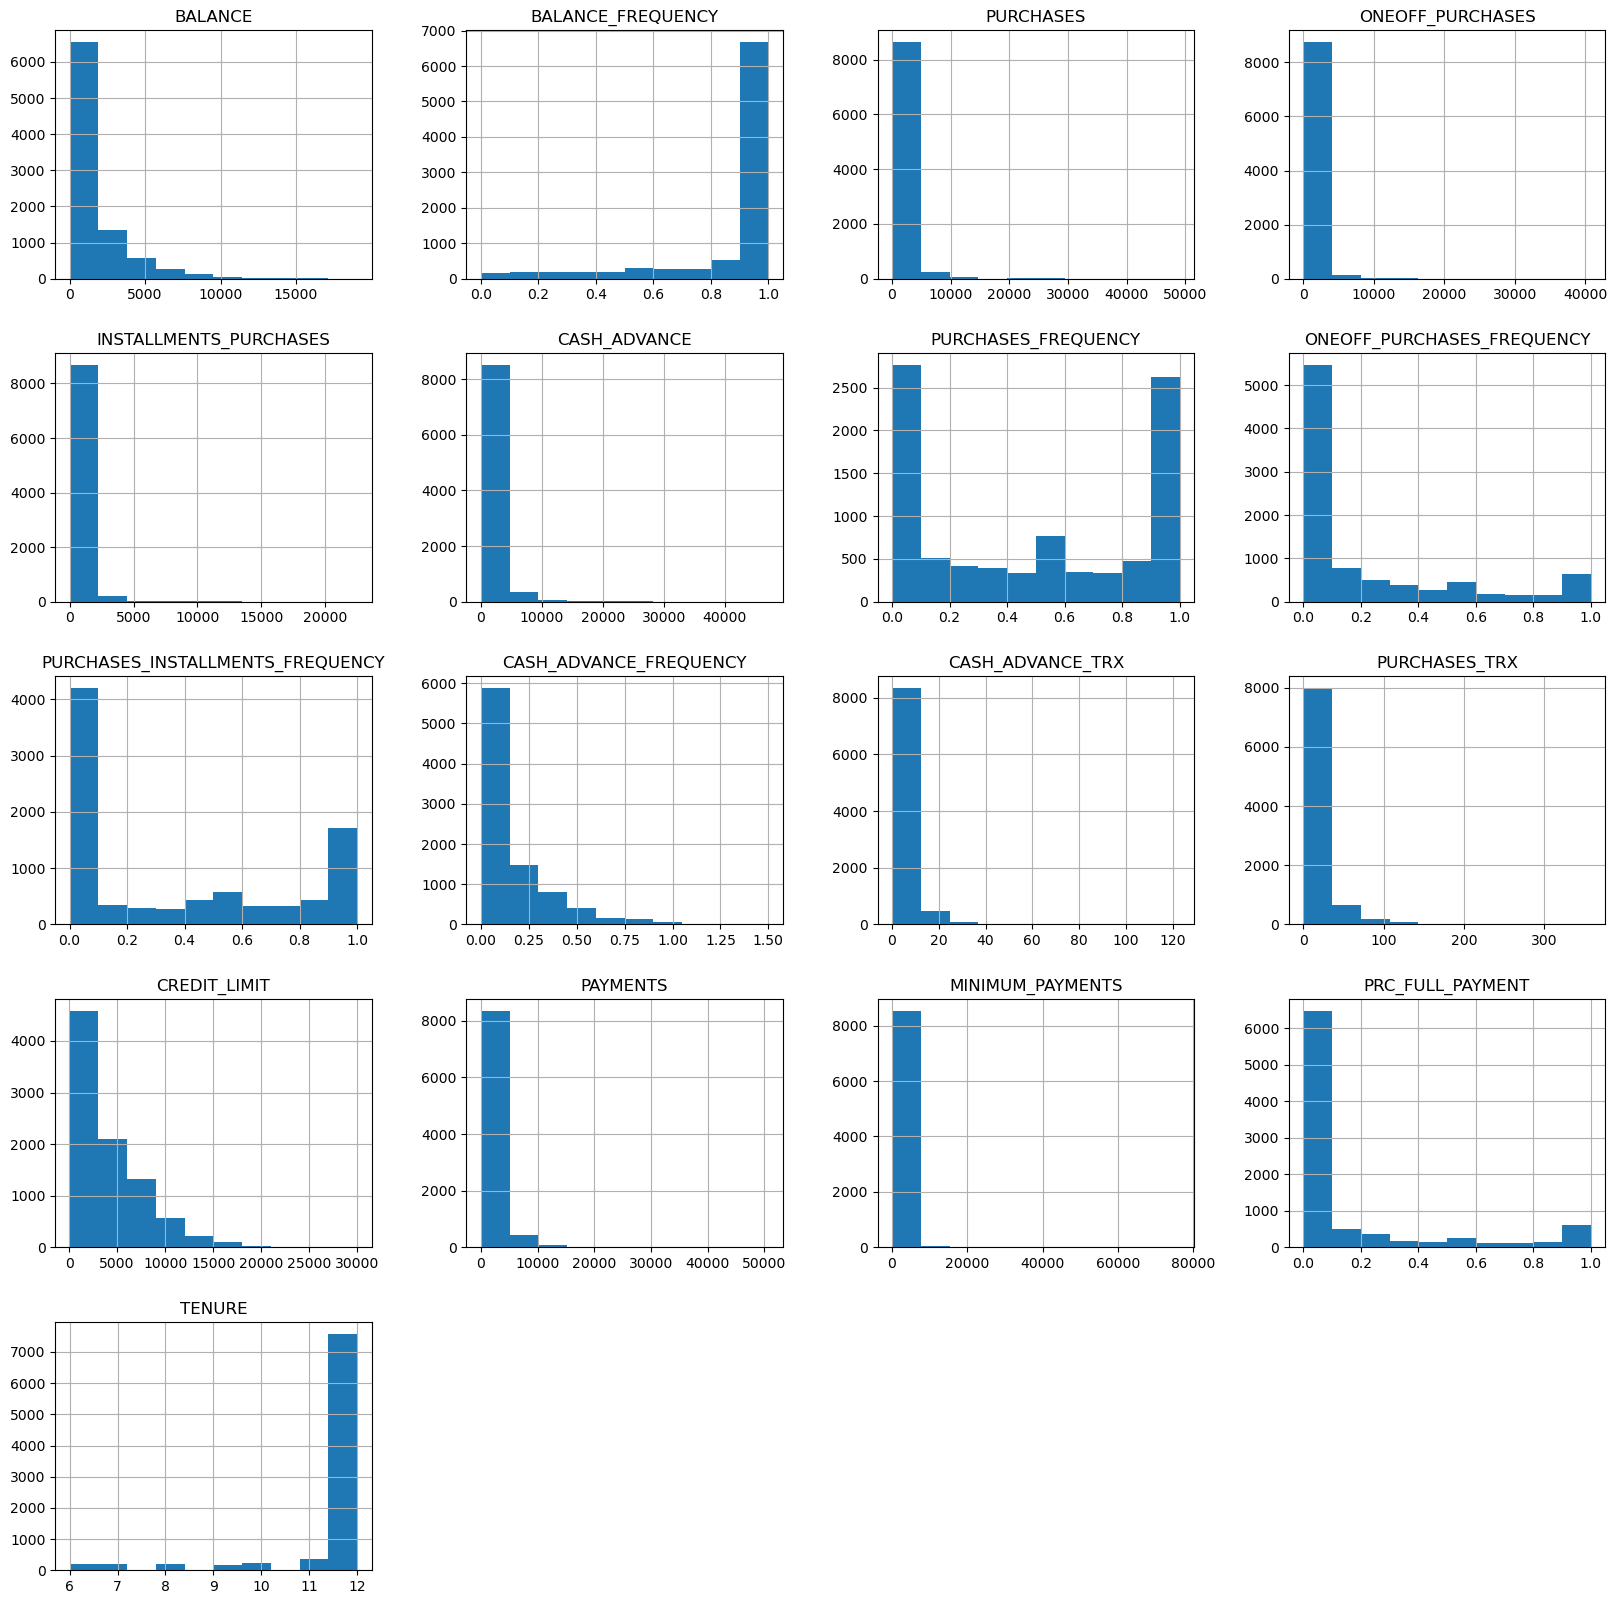

In [9]:
df.hist(bins=10, figsize = (20,20))
plt.show()

Berdasarkan plot histagram di atas, terlihat jika semua variabel berdistribusi skewed.

Pada missing values di Minimum Payment dan Credit Limit kelompok kami menggunakan median untuk mengisi missing values dikarenakan median tidak dipengaruhi oleh nilai ekstrem atau outlier, sehingga lebih stabil daripada mean (rata-rata). Median juga tidak terpengaruh oleh perubahan besar pada nilai data, sehingga lebih baik digunakan jika memiliki distribusi data yang skew (condong).

Menangani missing values menggunakan skicit-learn SimpleImputer untuk menggantikan nilai yang hilang dengan nilai yang telah ditentukan.

In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X) 

df['MINIMUM_PAYMENTS_NEW'] = X

X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2) 

df['CREDIT_LIMIT_NEW'] = X2

df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)

Mengecek kembali nilai missing values

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
MINIMUM_PAYMENTS_NEW                0
CREDIT_LIMIT_NEW                    0
dtype: int64

Melakukan pengecekan duplicated pada dataset:

In [12]:
df.duplicated().sum()

0

Karena duplicated values bernilai 0 yang memiliki arti bahwa tidak ada duplicated value pada dataset. 

# Exploratory Data Analysis

Proses EDA dilakukan dalam analisis data yang bertujuan untuk menggali pemahaman awal tentang data, mengidentifikasi pola, hubungan, anomali, dan tren dalam data sebelum melakukan analisis statistik yang lebih mendalam atau membangun model.

Menampilkan ringkasan statistik deskriptif dari dataset:

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,1733.143852,0.153715,11.517318,844.906767,4494.282473
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,2895.063757,0.292499,1.338331,2332.792322,3638.646702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.019163,50.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,383.276166,0.000000,12.000000,170.857654,1600.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,856.901546,0.000000,12.000000,312.343947,3000.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,1901.134317,0.142857,12.000000,788.713501,6500.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,50721.483360,1.000000,12.000000,76406.207520,30000.000000


Dari ringkasan statistik deskriptif di atas dapat diambil kesimpulan informasi bahwa:

1. Rata-rata saldo/Balance dari semua nasabah yaitu 1564 dollar
2. Balance Frequency atau seberapa sering saldo terupdate memiliki rata-rata bernilai 0,877 dengan max 1 atau memiliki arti mayoritas nasabah mengupdate saldonya.
3. Jumlah pembelian yang dilakukan dari akun nasabah yang paling tinggi di angka 49039
4. Credit limit minimal yaitu 50 dan maksimal 30000

### Melihat outliers

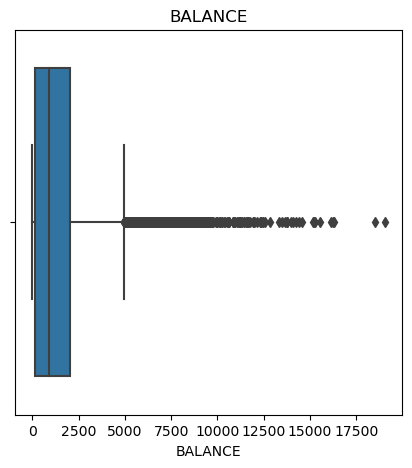

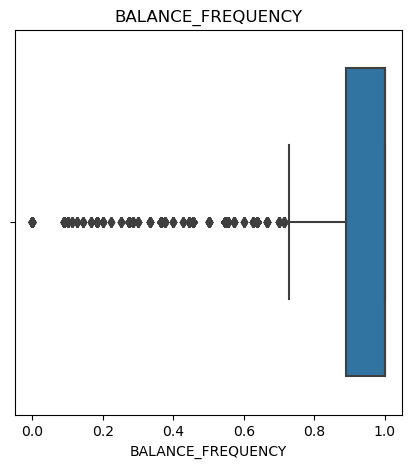

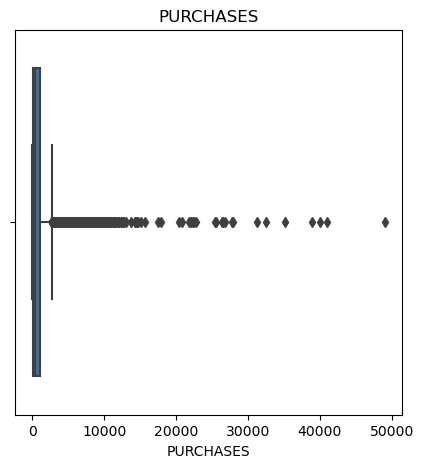

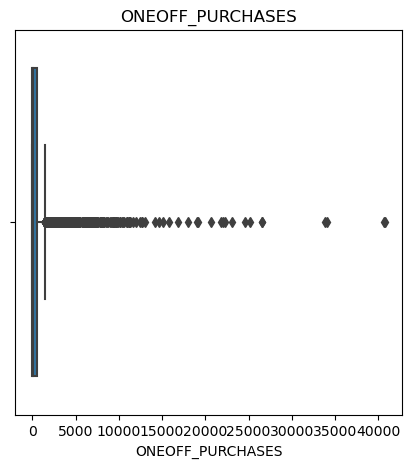

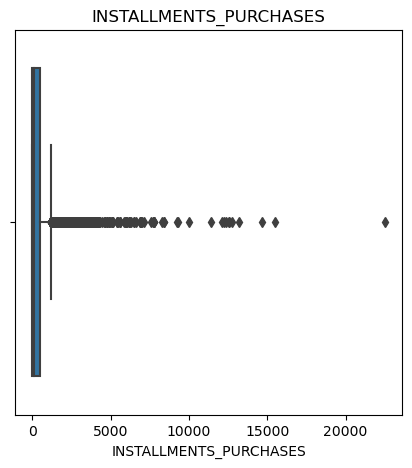

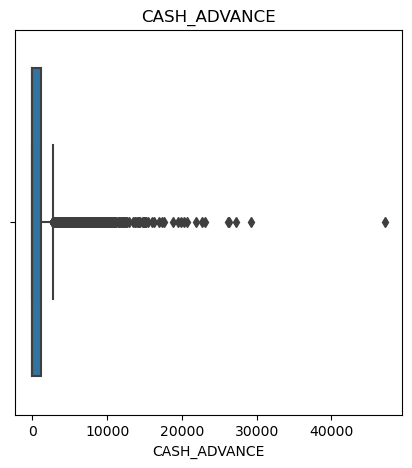

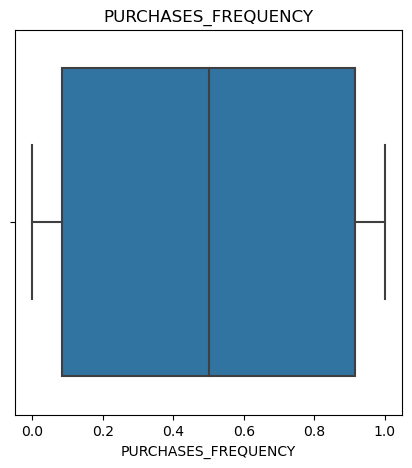

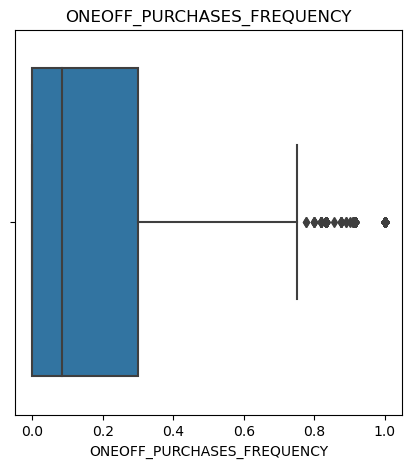

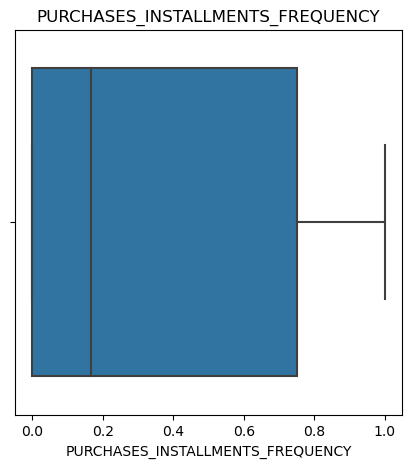

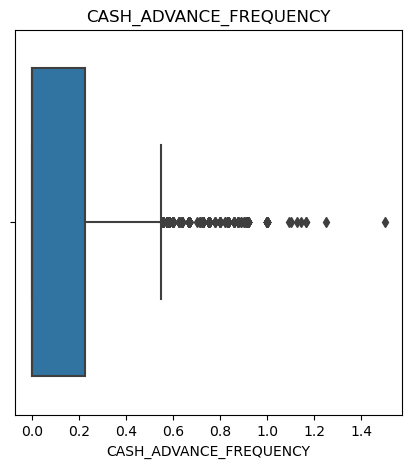

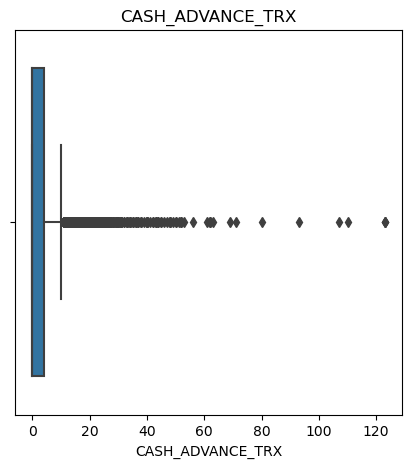

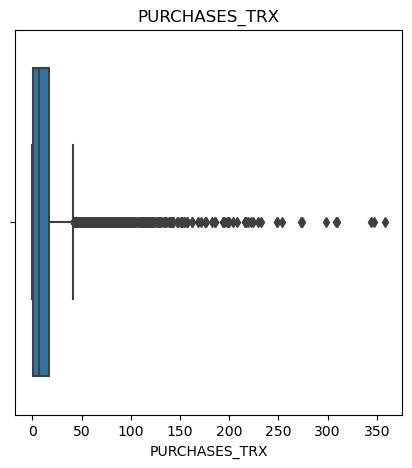

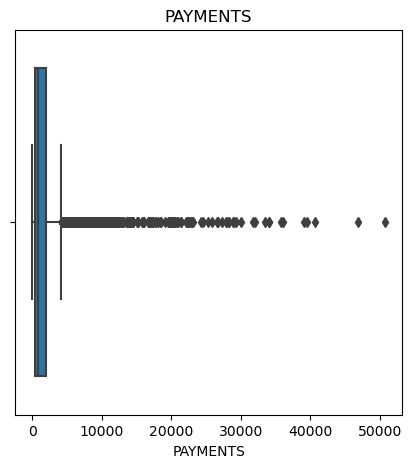

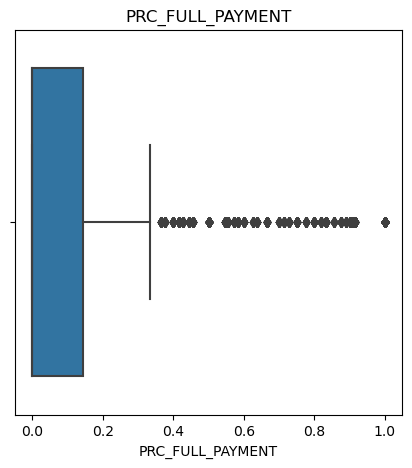

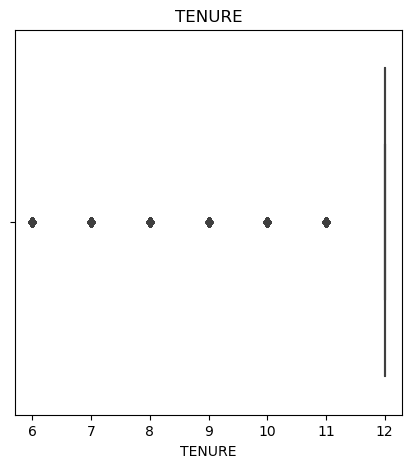

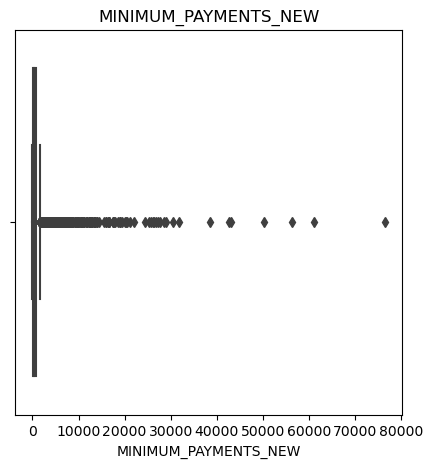

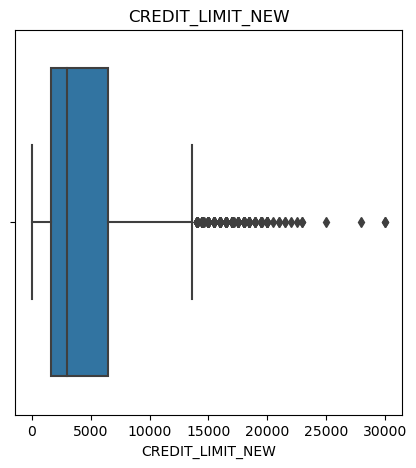

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Iterate over numeric columns and create boxplots
for feature in numeric_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[feature])
    plt.title(feature)

plt.show()


Dari hasil visualisasi di atas didapatkan bahwa masih terdapat atribut dengan nilai outlier yang banyak.

### Correlation Matrix

Membuat Correlation Matrix untuk mengukur sejauh mana dua variabel berkorelasi atau berhubungan satu sama lain.

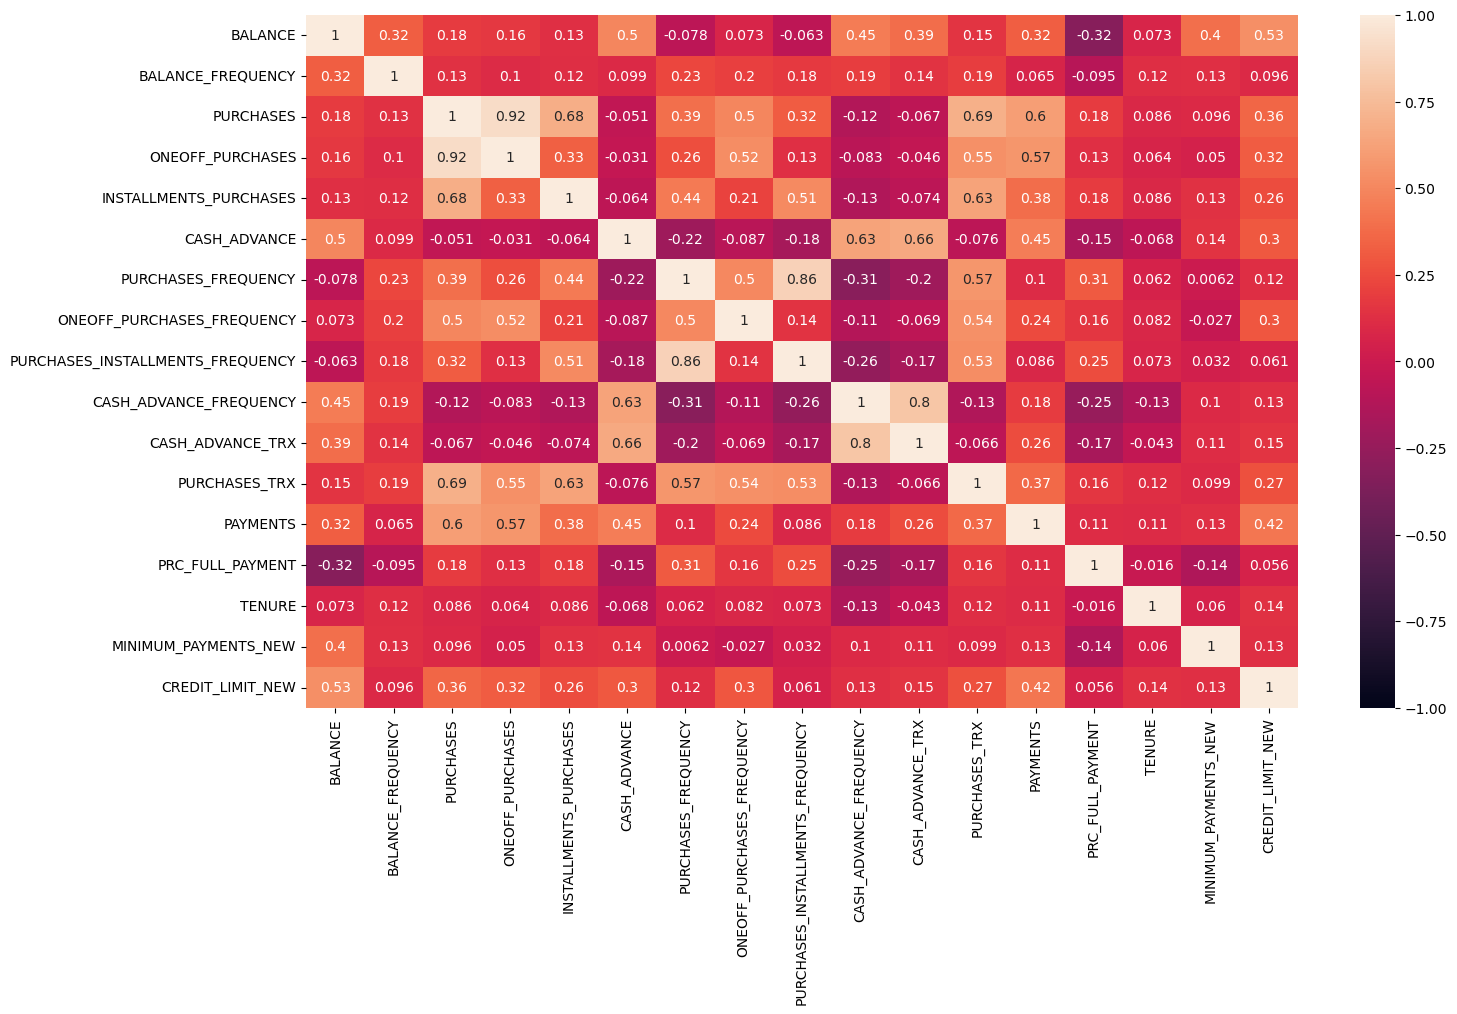

In [15]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [16]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.322802,-0.318959,0.072692,0.397920,0.531296
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.065008,-0.095082,0.119776,0.131181,0.095931
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.603264,0.180379,0.086288,0.095789,0.356977
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.567292,0.132763,0.064150,0.050256,0.319735
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.384084,0.182569,0.086143,0.134019,0.256515
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.453238,-0.152935,-0.068312,0.140747,0.303997
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.103464,0.305802,0.061506,0.006154,0.119833
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.243537,0.157531,0.082466,-0.027311,0.295059
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.085551,0.250087,0.073275,0.032055,0.060794
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.183192,-0.249773,-0.133372,0.100616,0.132608


Dari hasil visualisasi dan tabel di atas terlihat bahwa terdapat korelasi yang tinggi (>0,8) diantara 3 pasang atribut PURCHASES_INSTALLMENTS_FREQUENCY dengan PURCHASES_FREQUENCY ; CASH_ADVANCE_FREQUENCY dengan CASH_ADVANCE_TRX ; ONEOFF_PURCHASES dengan PURCHASES

# Data Preprocessing

Data preprocessing merupakan proses mempersiapkan data mentah menjadi bentuk yang sesuai untuk analisis atau pemodelan.

In [17]:
df2 = df.drop(['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'ONEOFF_PURCHASES'], axis=1)
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,201.802084,0.000000,12,139.509787,1000.0
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,4103.032597,0.222222,12,1072.340217,7000.0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,622.066742,0.000000,12,627.284787,7500.0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,0.000000,0.000000,12,312.343947,7500.0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,678.334763,0.000000,12,244.791237,1200.0


### Standardize & Normalize Data

Diketahui sebelumnya bahwa data memiliki range yang berbeda dan satuan yang berbeda, untuk itu perlu dilakukan standard scaler agar diperoleh kesamaan dalam satuan.

In [18]:
sc = StandardScaler()
df2=sc.fit_transform(df2)

In [19]:
normalized_df = normalize(df2) 

In [20]:
normalized_df.shape

(8950, 14)

In [21]:
feat_cols = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
            'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX',
            'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
normalised = pd.DataFrame(normalized_df,columns=feat_cols)
# melihat data yang sudah dinormalisasikan
normalised.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.339570,-0.115713,-0.197111,-0.161938,-0.216542,-0.374131,-0.314831,-0.313295,-0.237208,-0.245394,-0.243803,0.167319,-0.140284,-0.445520
1,0.228846,0.039061,-0.136544,-0.132190,0.757703,-0.355284,-0.197353,0.166907,-0.172093,0.238059,0.068113,0.104885,0.028353,0.200266
2,0.132564,0.153598,-0.031921,-0.134770,-0.138389,0.376475,0.792607,-0.200223,-0.032322,-0.113788,-0.155812,0.106932,-0.027659,0.244917
3,0.023168,-0.479852,0.109497,-0.214493,-0.173950,-0.478518,-0.188420,-0.122169,-0.260257,-0.282493,-0.247983,0.170188,-0.107727,0.389798
4,-0.170876,0.246751,-0.220070,-0.216504,-0.222319,-0.483005,-0.190187,-0.321653,-0.262698,-0.173540,-0.250308,0.171783,-0.122530,-0.431226


Membuat inertia untuk mencoba berbagai jumlah klaster (dari 1 hingga 9) dan menghitung inertia untuk setiap iterasi dan untuk memilih jumlah klaster yang optimal.

In [22]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(normalised)
    inertia.append(model.inertia_)
    
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 10)])
inertia_df

,Inertia
1,8734.793220
2,6950.977508
3,6009.985740
4,5238.964672
5,4648.241512
6,4229.360728
7,3892.087995
8,3666.759831
9,3467.855937


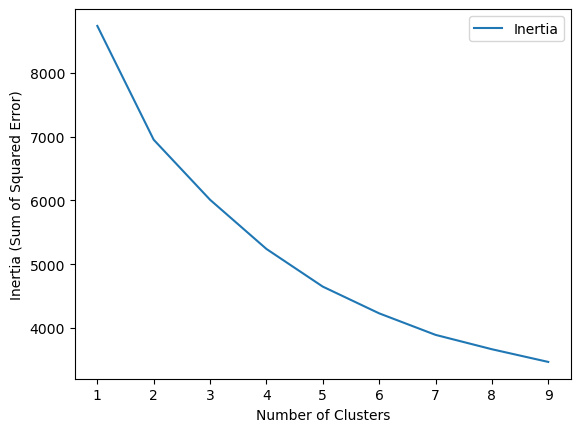

In [23]:
inertia_df.plot(kind='line')
plt.ylabel('Inertia (Sum of Squared Error)')
plt.xlabel('Number of Clusters')
plt.show()

Nilai inertia menunjukkan bahwa k kluster yang dapat dipilih yakni 4-6 kluster. Dalam memilih banyaknya kluster harus mempertimbangkan computation cost, sehingga dipilih banyaknya k kluster yakni 4 kluster.

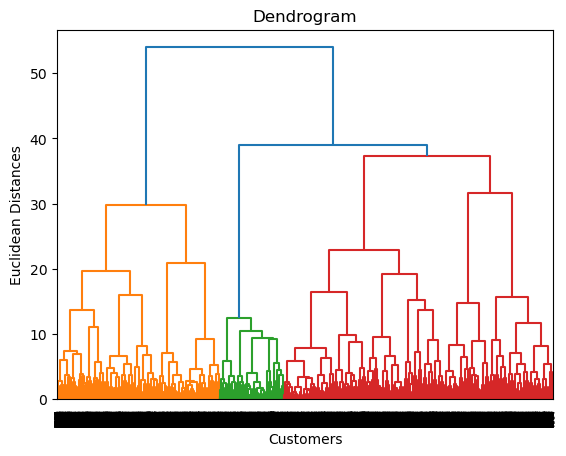

In [24]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(normalised, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

Penentuan banyak cluster dari dendrogram dapat dilakukan dengan mencari garis vertikal terpanjang di mana dia tidak berpotongan dengan garis horizontal manapun. Dari gambar di atas diperoleh bahwa banyak kluster yang optimal yakni 4 kluster.

# Model Defining

Metode pengujian pada training ini menggunakan metode K-Means clustering. Alasan penggunaan metode ini yaitu untuk mengelompokkan data menjadi klaster-klaster berdasarkan kemiripan karakteristik, sehingga metode ini cocok digunakan untuk tipe data prediksi yang bersifat non-supervisi dan tidak memiliki label kategori sebelumnya. Dengan n_cluster: 4 dan random state sebanyak 42.

In [25]:
km = KMeans(n_clusters=4, random_state=42)

# Model Training

Model Training dilakukan untuk membuat model yang dapat memahami pola dalam data dan menghasilkan hasil yang baik saat diterapkan pada data yang tidak pernah dilihat sebelumnya.

In [26]:
norm = normalised.iloc[:,0:14]

In [27]:
df_m1 = km.fit(norm)

In [37]:
labels=km.labels_

In [38]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS_NEW,CREDIT_LIMIT_NEW,Cluster KM,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12,139.509787,1000.0,3,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12,1072.340217,7000.0,0,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12,627.284787,7500.0,2,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12,312.343947,7500.0,1,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12,244.791237,1200.0,3,3


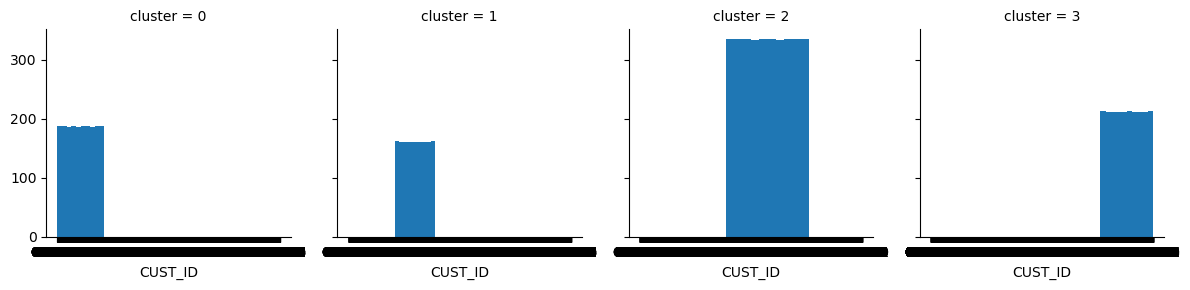

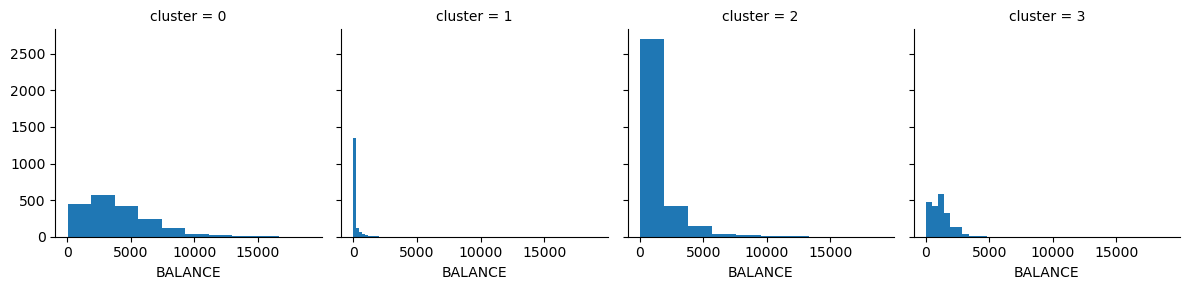

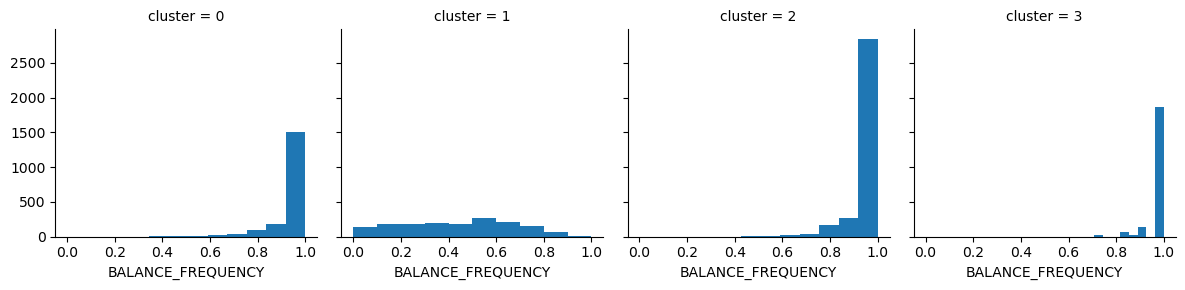

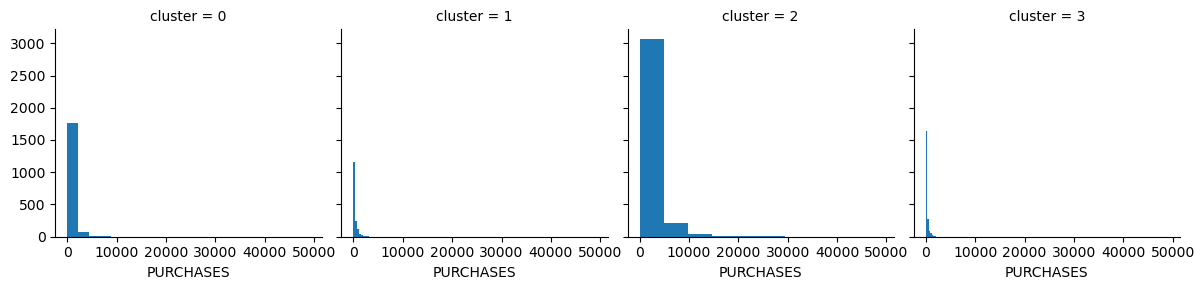

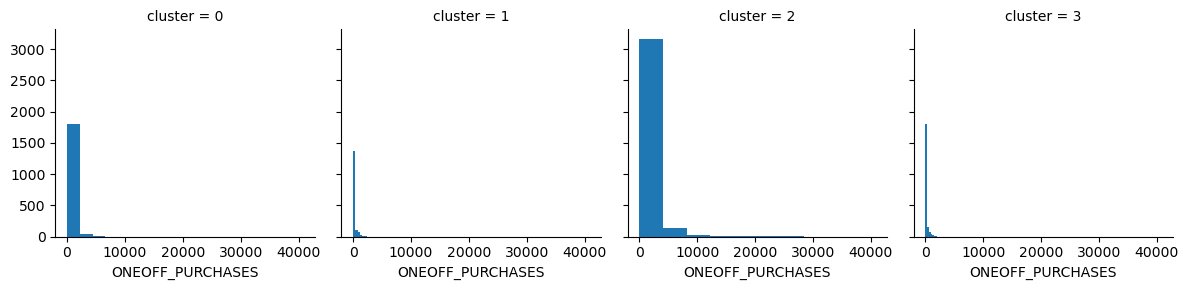

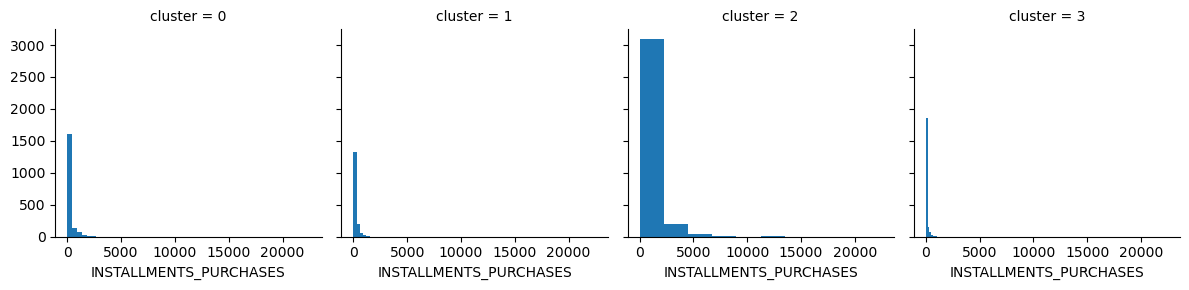

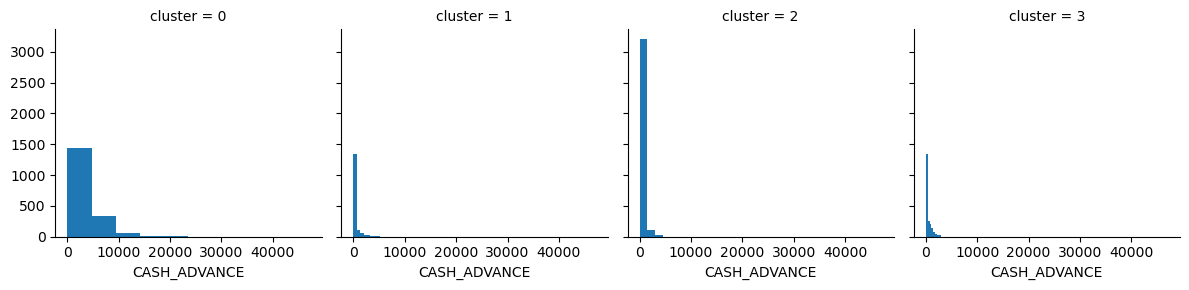

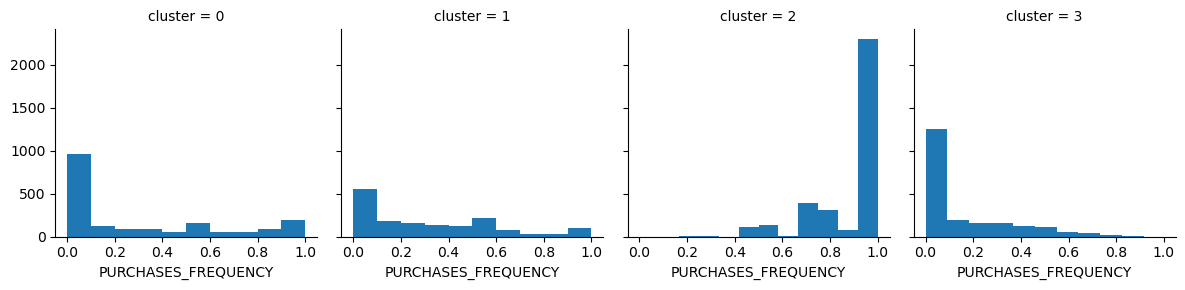

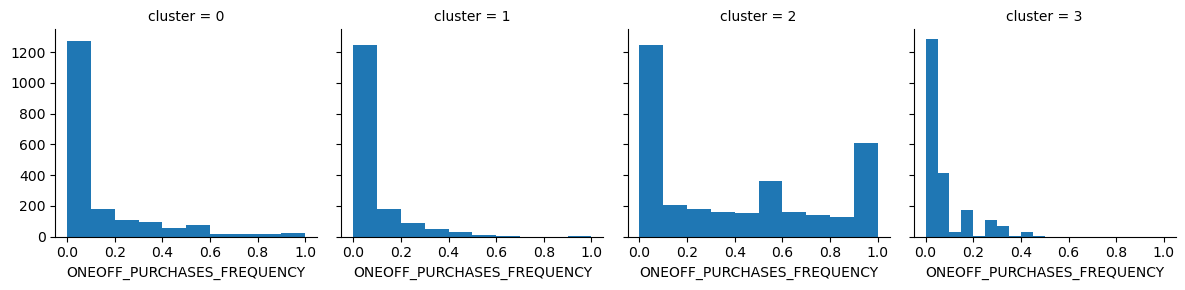

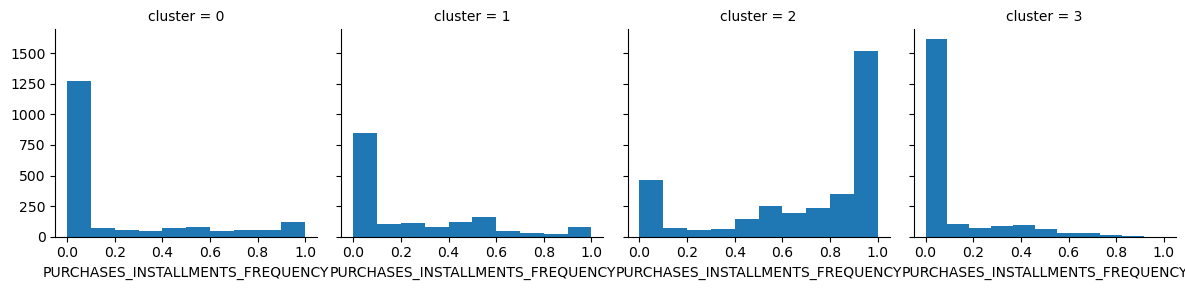

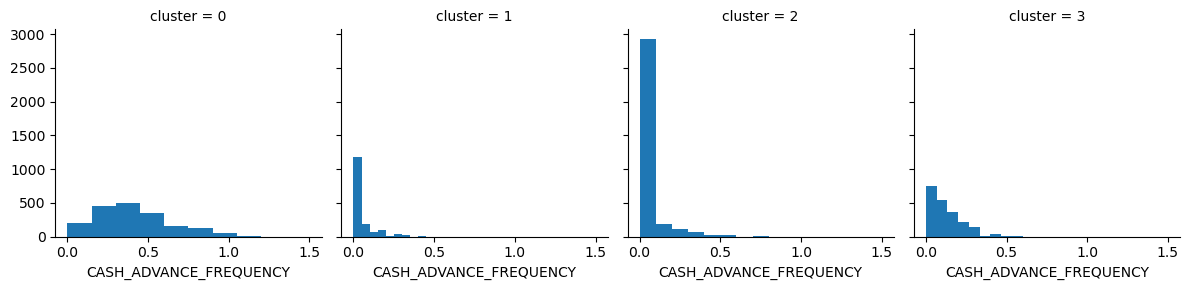

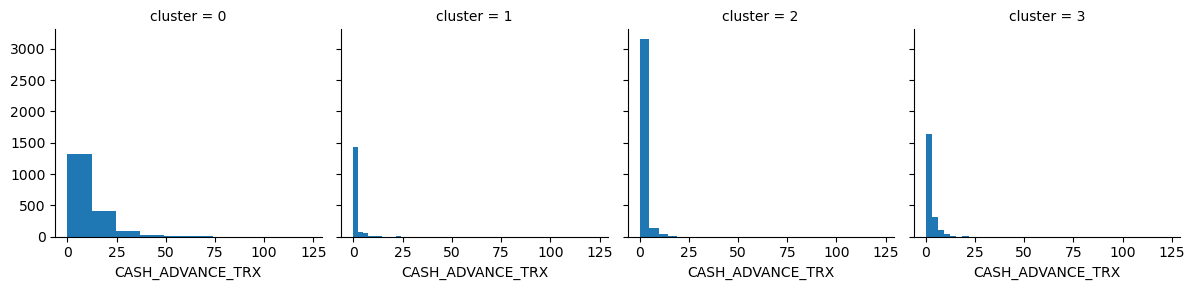

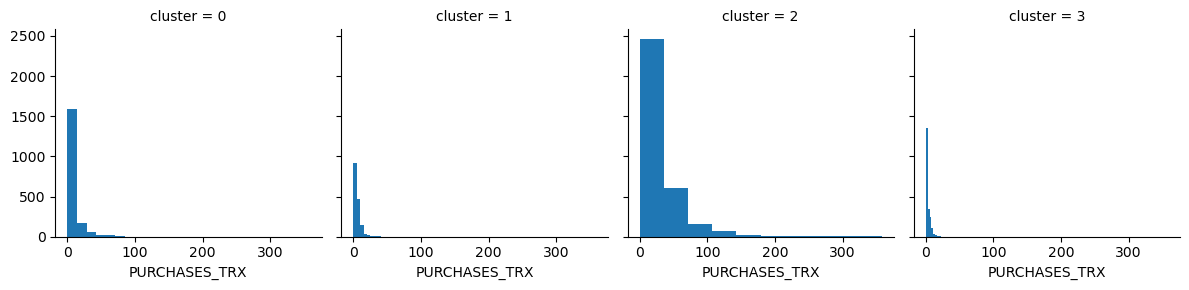

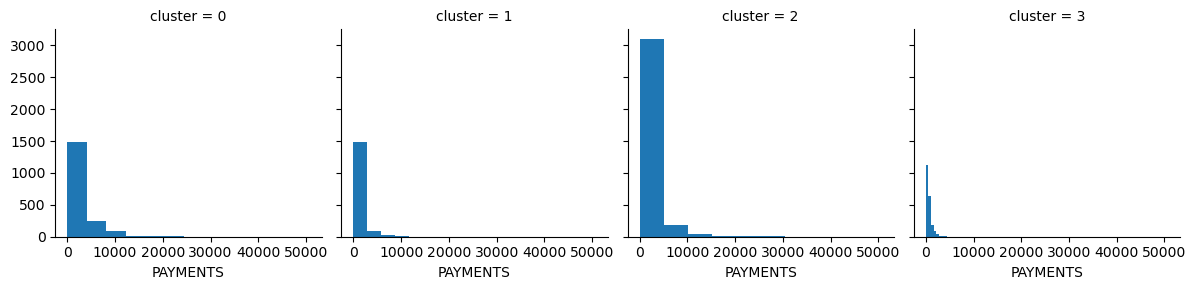

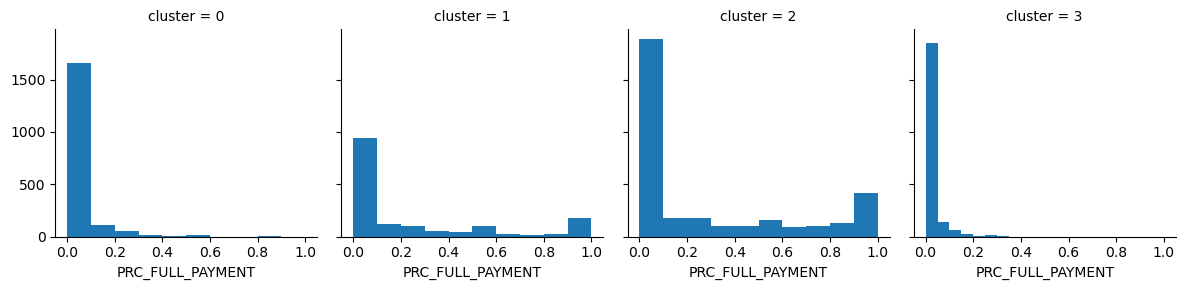

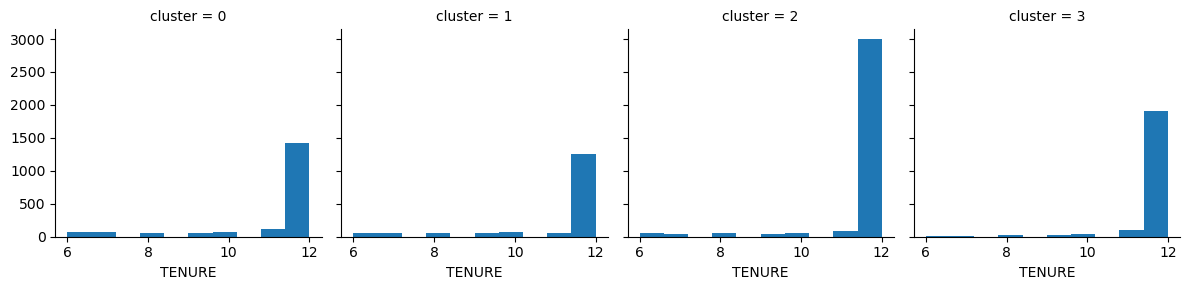

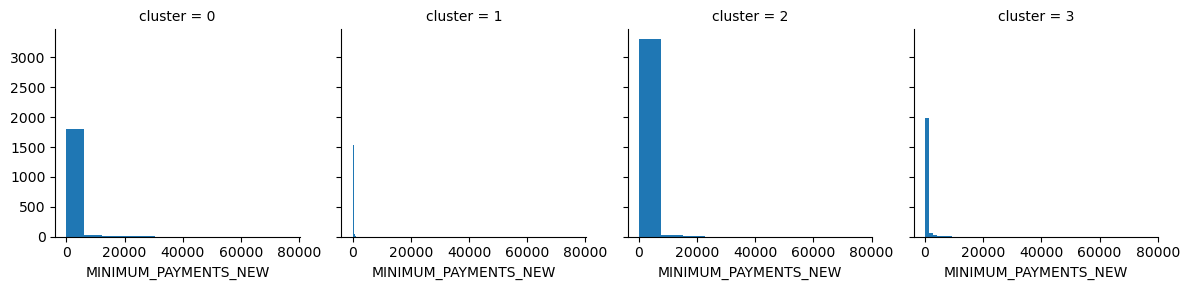

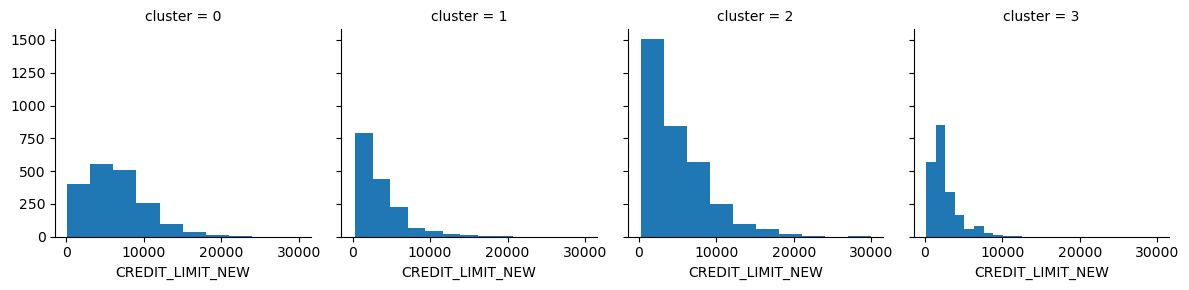

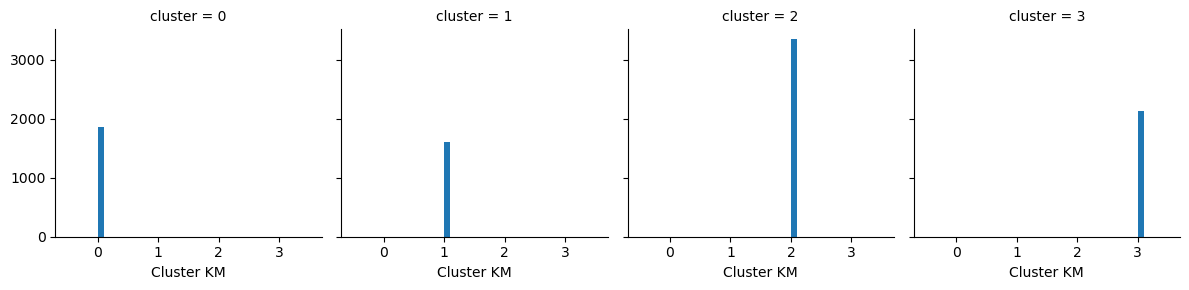

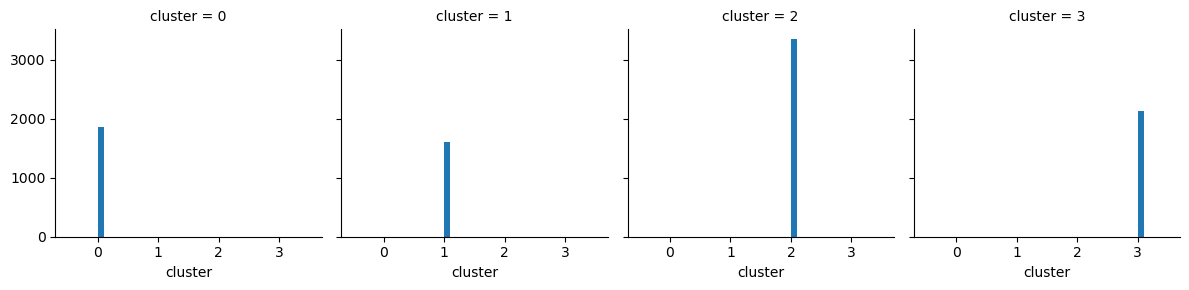

In [39]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

# Model Evaluation

Model Evaluation dilakukan untuk memahami sejauh mana model dapat memprediksi atau mengklasifikasikan data dengan benar, sekaligus mengidentifikasi kelemahan model yang perlu diperbaiki atau dioptimalkan

In [28]:
normalised['Cluster KM'] = km.fit_predict(normalised)

In [29]:
df['Cluster KM'] = km.fit_predict(normalised)

In [30]:
normalised.iloc[:,0:14].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.339570,-0.115713,-0.197111,-0.161938,-0.216542,-0.374131,-0.314831,-0.313295,-0.237208,-0.245394,-0.243803,0.167319,-0.140284,-0.445520
1,0.228846,0.039061,-0.136544,-0.132190,0.757703,-0.355284,-0.197353,0.166907,-0.172093,0.238059,0.068113,0.104885,0.028353,0.200266
2,0.132564,0.153598,-0.031921,-0.134770,-0.138389,0.376475,0.792607,-0.200223,-0.032322,-0.113788,-0.155812,0.106932,-0.027659,0.244917
3,0.023168,-0.479852,0.109497,-0.214493,-0.173950,-0.478518,-0.188420,-0.122169,-0.260257,-0.282493,-0.247983,0.170188,-0.107727,0.389798
4,-0.170876,0.246751,-0.220070,-0.216504,-0.222319,-0.483005,-0.190187,-0.321653,-0.262698,-0.173540,-0.250308,0.171783,-0.122530,-0.431226


In [31]:
sil_km = silhouette_score(normalised.iloc[:,0:14], normalised['Cluster KM'])
ch_km = calinski_harabasz_score(normalised.iloc[:,0:14], normalised['Cluster KM'])
db_km = davies_bouldin_score(normalised.iloc[:,0:14], normalised['Cluster KM'])

In [46]:
model_selection = pd.DataFrame({'KMeans': [sil_km]}, 
                                index=['Silhouette Score'])
model_selection

,KMeans
Silhouette Score,0.216531


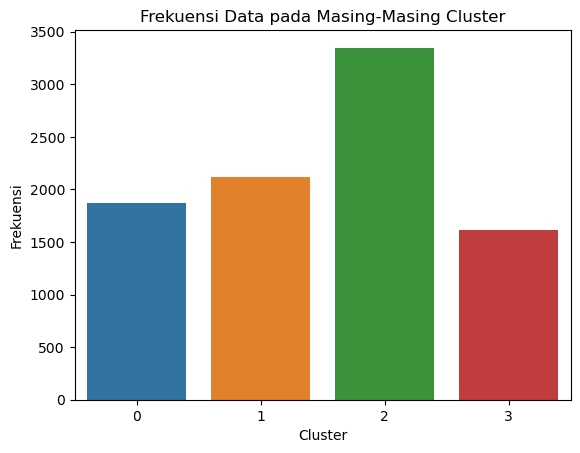

In [33]:
cluster_x1 = normalised['Cluster KM'].value_counts().index
cluster_y1 = normalised['Cluster KM'].value_counts().values

sns.barplot(x=cluster_x1, y=cluster_y1)
plt.title("Frekuensi Data pada Masing-Masing Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")
plt.show()

### Reduksi dimensi menggunakan PCA (Principal Component Analysis)

In [34]:
dist = 1 - cosine_similarity(df2)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

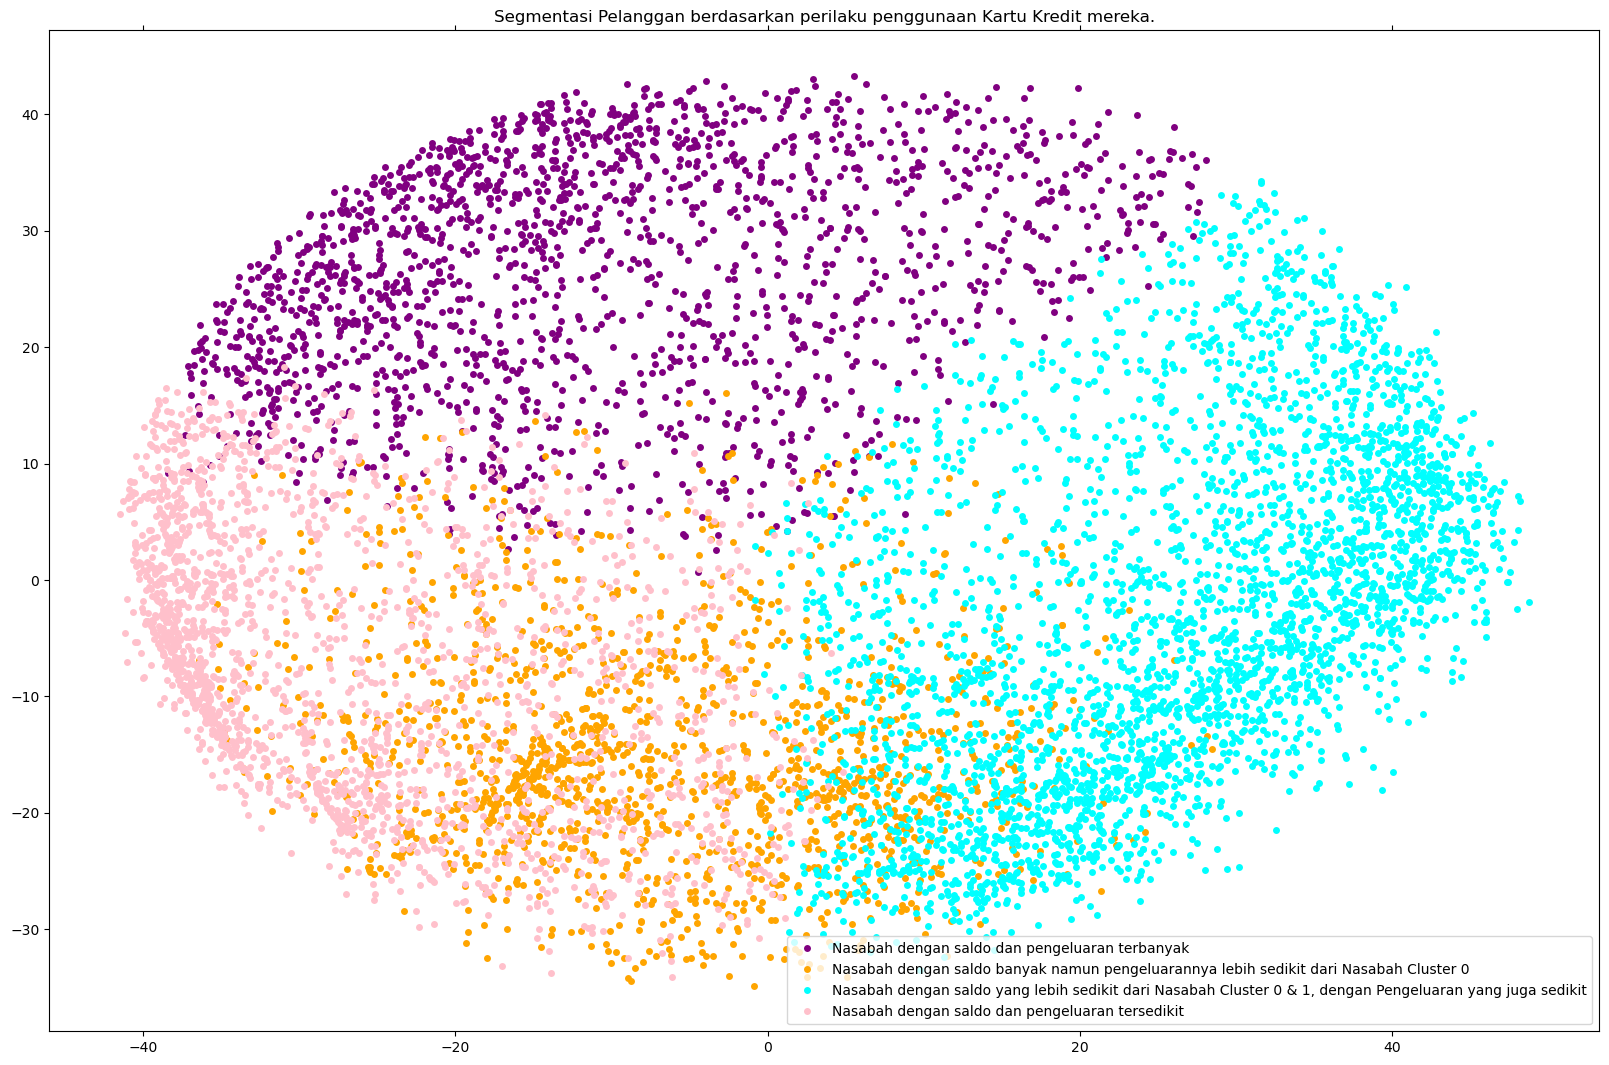

In [48]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'purple',
          1: 'orange',
          2: 'cyan', 
          3: 'pink'}

names = {0: 'Nasabah dengan saldo dan pengeluaran terbanyak', 
         1: 'Nasabah dengan saldo banyak namun pengeluarannya lebih sedikit dari Nasabah Cluster 0', 
         2: 'Nasabah dengan saldo yang lebih sedikit dari Nasabah Cluster 0 & 1, dengan Pengeluaran yang juga sedikit', 
         3: 'Nasabah dengan saldo dan pengeluaran tersedikit'}

df = pd.DataFrame({'x': x, 'y': y, 'label': labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    if name in colors:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name], label=names[name], mec='none')
    
ax.set_aspect('auto')
ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')

ax.legend()
ax.set_title("Segmentasi Pelanggan berdasarkan perilaku penggunaan Kartu Kredit mereka.")
plt.show()


# Model Inference

Model Inference dilakukan untuk mengaplikasikan model yang telah ada ke situasi dunia nyata untuk memperoleh wawasan, membuat keputusan, atau memprediksi hasil. Dari hasil Model Evaluation, digunakan Random Forest Classifier untuk melakukan Model Inference

In [58]:
X_new = {'BALANCE':[50,3000], 'BALANCE_FREQUENCY':[0.8,1], 'PURCHASES':[120,300],'INSTALLMENTS_PURCHASES':[0,30],
         'CASH_ADVANCE':[20,123], 'PURCHASES_FREQUENCY':[0.2,0.5], 'ONEOFF_PURCHASES_FREQUENCY':[0,0.5],
         'CASH_ADVANCE_FREQUENCY':[0.2,0.6],'PURCHASES_TRX':[4,15],'CREDIT_LIMIT':[2000,50000],'PAYMENTS':[20,2000],
         'MINIMUM_PAYMENTS':[15,1500],'PRC_FULL_PAYMENT':[0,0],'TENURE':[12,12]
}
X_new = pd.DataFrame(X_new)
X_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,50,0.8,120,0,20,0.2,0.0,0.2,4,2000,20,15,0,12
1,3000,1.0,300,30,123,0.5,0.5,0.6,15,50000,2000,1500,0,12


Melakukan standarisasi dan normalisasi pada data baru:

In [59]:
sc = StandardScaler()
Xnew=sc.fit_transform(X_new)
Xnew = normalize(Xnew) 

In [60]:
feat_cols = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
            'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX',
            'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
Xnew = pd.DataFrame(Xnew,columns=feat_cols)
Xnew.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,0.0,0.0
1,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.288675,0.0,0.0


In [63]:
model = km.fit(norm)

In [64]:
model.predict(Xnew)

array([3, 2])

Hasil dari prediksi nasabah pertama menunjukkan cluster 3, dan nasabah kedua menunjukkan cluster 2

# Conclusion

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:
- Dari dataset yang digunakan terdapat 18 fitur yang kemudian dipilih hanya 14 fitur sebagai pembentuk setiap clusternya
- Dari hasil K-Means, didapatkan hasil Sillhoutte Score sekitar 0.216531
- Menggunakan cluster hierarcy, didapatkan 4 cluster yang digunakan pada dataset ini
- Dari hasil PCA didapatkan bahwa Cluster 0 merupakan Nasabah dengan saldo dan pengeluaran terbanyak, sedangkan Cluster 1 merupakan Nasabah dengan saldo banyak namun pengeluarannya lebih sedikit dari Nasabah Cluster 0, lalu Cluster 2 merupakan Nasabah dengan saldo yang lebih sedikit dari Nasabah Cluster 0 & 1, dengan Pengeluaran yang juga sedikit, dan yang terakhir Cluster 3 dengan Nasabah dengan saldo dan pengeluaran tersedikit.

In [65]:
pickle.dump(km, open('kmeans.pkl', "wb"))